In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [187]:
class MultipleLinearRegressionCustom:
    
    def __init__(self):
        self.intercept = None
        self.coefficient = None
        
    def fit(self,X_train,y_train):
        X_train= np.insert(X_train,0,1,axis=1)
        
        X_train_trans = np.transpose(X_train)
        
        print('X_train', X_train.shape)
        print('X_train_transpose', X_train_trans.shape)
        
        beta = np.linalg.inv(np.dot(X_train_trans,X_train)).dot(X_train_trans).dot(y_train)
        
        self.intercept = beta[0]
        self.coefficient = beta[1:]
        
        return self
    
    def predict(self,X_test):
        
#         X_test = np.insert(X_test,0,1,axis=1)
        
        y_pred = self.intercept + np.dot(X_test,self.coefficient)
        
        return y_pred

In [5]:
from sklearn.datasets import load_diabetes

In [6]:
dataset = load_diabetes()

In [15]:
X_array = dataset['data']

In [16]:
y_array = dataset['target']

In [19]:
X_array.shape

(442, 10)

In [20]:
y_array.shape

(442,)

In [22]:
X_array[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [24]:
dataset['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [25]:
columns = ['age', 'sex', 'bmi', 'bp', 'blood_serum1', 'blood_serum2', 'blood_serum3', 'blood_serum4', 'blood_serum5', 'blood_serum6']

In [26]:
X = pd.DataFrame(X_array,columns=columns)

In [31]:
X.head()

,age,sex,bmi,bp,blood_serum1,blood_serum2,blood_serum3,blood_serum4,blood_serum5,blood_serum6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [28]:
y = pd.DataFrame(y_array, columns=['Diabates'])

In [30]:
y.head()

,Diabates
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [32]:
X.isnull().sum()

age             0
sex             0
bmi             0
bp              0
blood_serum1    0
blood_serum2    0
blood_serum3    0
blood_serum4    0
blood_serum5    0
blood_serum6    0
dtype: int64

In [33]:
y.isnull().sum()

Diabates    0
dtype: int64

In [34]:
df_X_y = X

In [35]:
df_X_y['Diabates'] = y['Diabates']

In [36]:
df_X_y

,age,sex,bmi,bp,blood_serum1,blood_serum2,blood_serum3,blood_serum4,blood_serum5,blood_serum6,Diabates
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### EDA - Exploratory Data Analysis

#### Univariate EDA

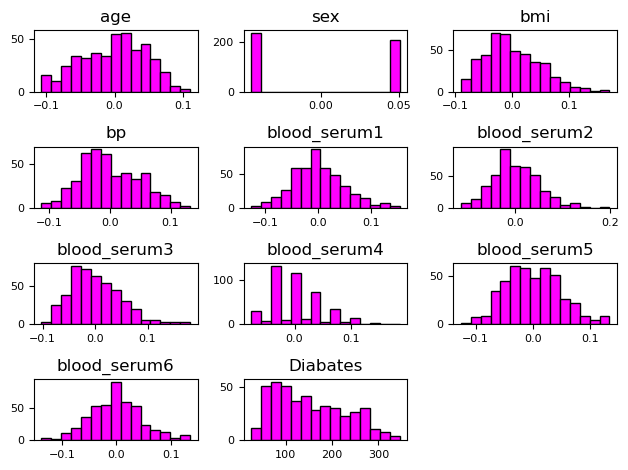

In [59]:
df_X_y.hist(bins=15, color='magenta', edgecolor='black', linewidth=1.0, 
            xlabelsize=8,ylabelsize=8,grid=False)
matplotlib.pyplot.tight_layout()

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_4143/1175826016.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_y['bmi'])


[Text(0.5, 1.0, 'Body Mass Index of Patient'),
 Text(0.5, 0, 'BMI Values'),
 Text(0, 0.5, 'Density')]

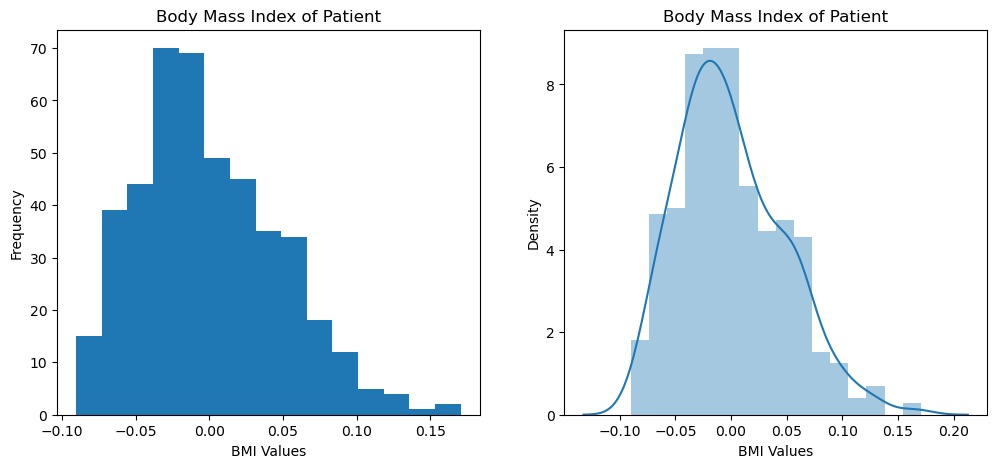

In [66]:
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
ax1.hist(df_X_y['bmi'], bins=15)
ax1.set(title='Body Mass Index of Patient', xlabel='BMI Values', ylabel='Frequency')

ax2 = plt.subplot(1,2,2)
sns.distplot(df_X_y['bmi'])
ax2.set(title='Body Mass Index of Patient', xlabel='BMI Values', ylabel='Density')

/var/folders/03/17q0xl853nxgk_46r8x0vbkr0000gn/T/ipykernel_4143/4081804061.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_X_y['Diabates'], bins=10)


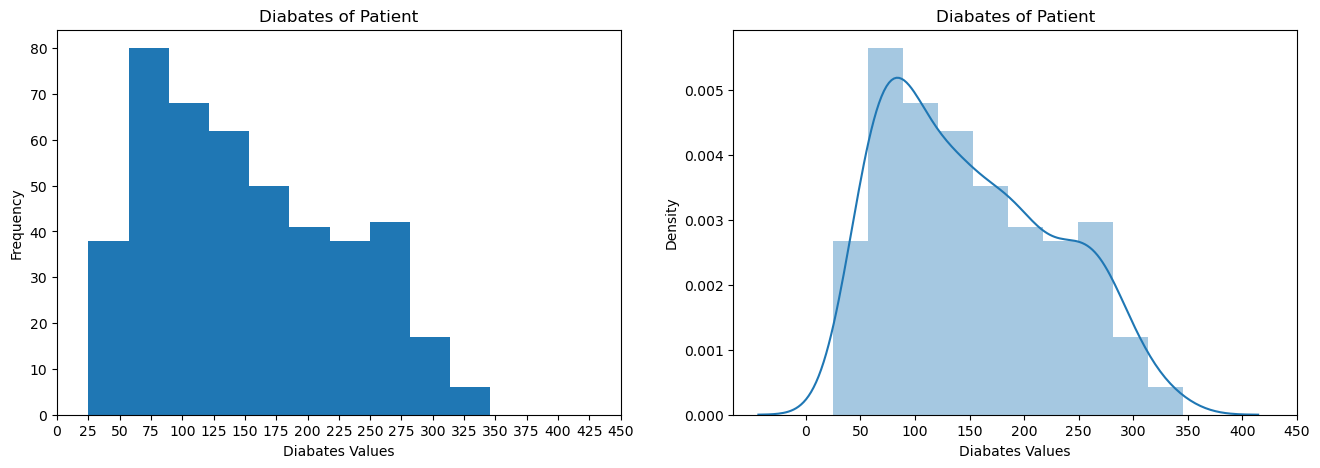

In [81]:
fig = plt.figure(figsize=(16,5))
ax1 = plt.subplot(1,2,1)
ax1.hist(df_X_y['Diabates'], bins=10)
ax1.set(title='Diabates of Patient', xlabel='Diabates Values', ylabel='Frequency')
plt.xticks([0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450])

ax2 = plt.subplot(1,2,2)
sns.distplot(df_X_y['Diabates'], bins=10)
ax2.set(title='Diabates of Patient', xlabel='Diabates Values', ylabel='Density')
plt.xticks([0,50,100,150,200,250,300,350,400,450])

plt.show()

#### Multivariate EDA

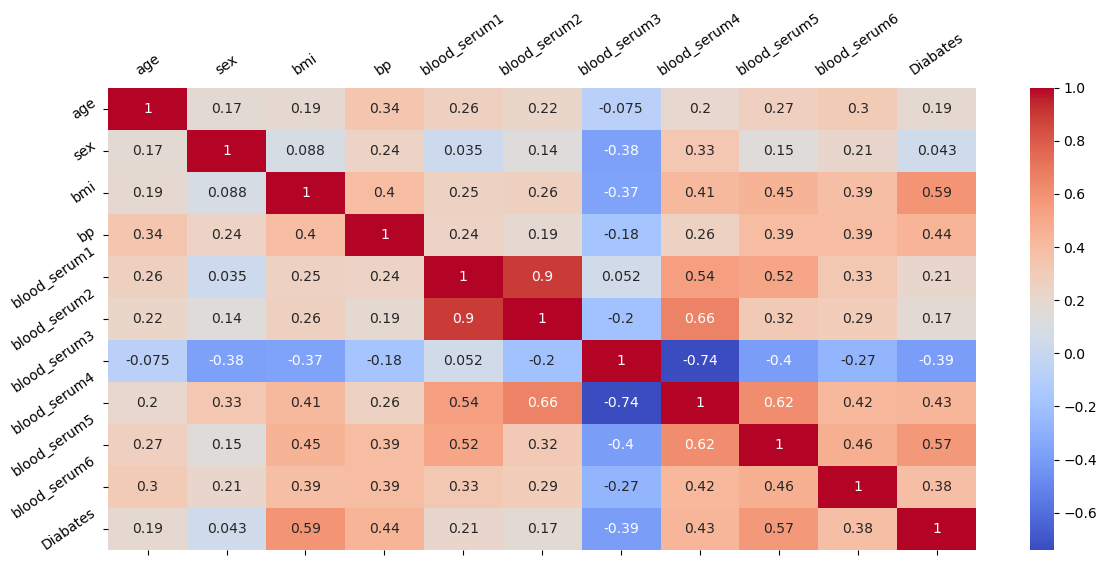

In [94]:
fig = plt.figure(figsize=(14,6))
ax1 = plt.subplot(1,1,1)

correlation = df_X_y.corr()
correlation

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.tick_params(labeltop=True, labelbottom=False, labelrotation=35)

In [97]:
col = columns
col.append('Diabates')

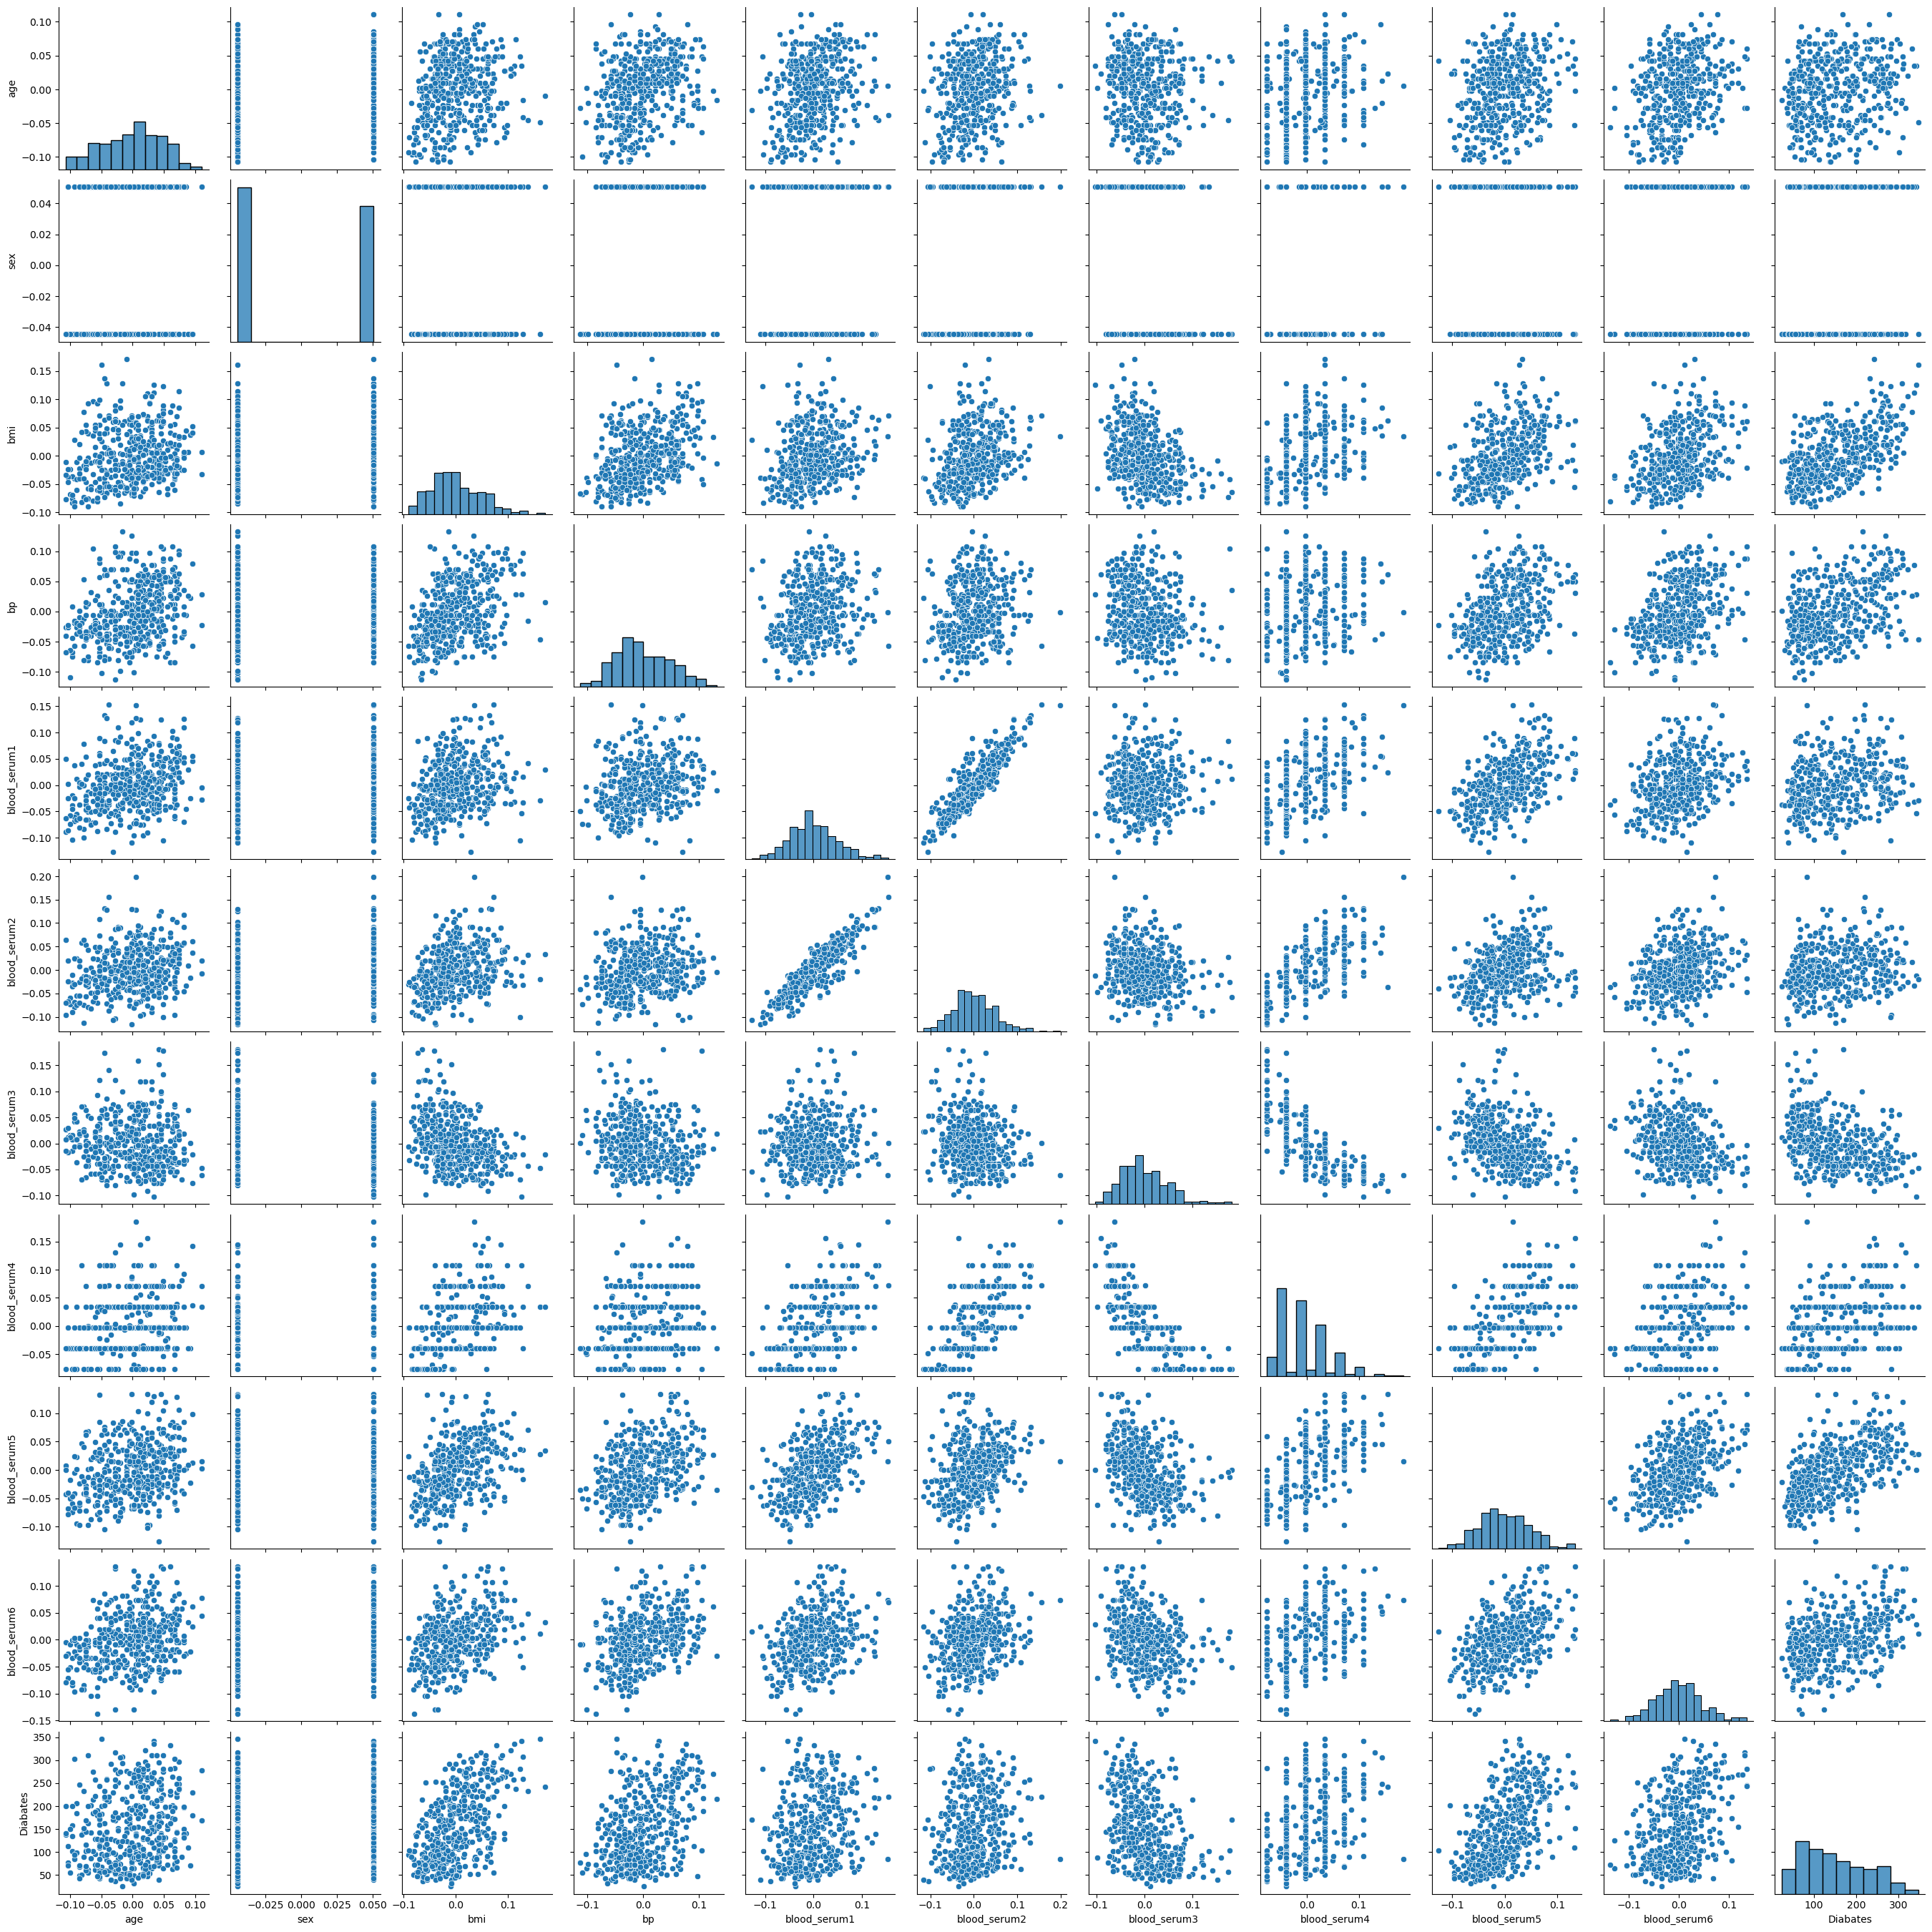

In [99]:
sns.pairplot(df_X_y[col])

### Splitting train & test data

In [105]:
X = X.drop('Diabates',axis=1)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_array,y_array,test_size=0.2)

In [130]:
X_train.shape

(353, 10)

In [129]:
X_test.shape

(89, 10)

In [131]:
y_train.shape

(353,)

In [132]:
y_test.shape

(89,)

In [188]:
mlr_custom = MultipleLinearRegressionCustom()

In [189]:
mlr_custom.fit(X_train,y_train)

X_train (353, 11)
X_train_transpose (11, 353)


In [201]:
y_pred = mlr_custom.predict(X_test)

In [202]:
y_pred

array([107.37968708, 157.0981104 , 174.2304451 , 287.98394019,
       143.37663505,  86.7025589 ,  53.46624058,  33.42132319,
       126.2626306 , 187.58027647, 137.1670105 , 213.3850999 ,
       253.39650418, 156.03532158, 152.37244423, 109.69340991,
       117.69669283, 159.01840185, 252.42837543, 153.9436897 ,
       191.05156542, 248.43014287, 169.79406078, 260.78095203,
       117.89221652, 239.15971578, 101.10183472, 168.58522134,
       183.03667168, 138.66150025, 196.90410442, 169.64974835,
        61.33069636,  70.73541254,  73.94935085, 147.54685034,
       135.4626851 , 197.06494479,  69.40720667, 122.84072366,
        95.59350185, 202.55784293,  95.99899773,  80.55452962,
       123.26976156, 238.10758338,  76.39558005, 140.25180382,
       114.73069369,  55.79218836, 281.52562649, 225.00833142,
       133.44844335, 123.64417387,  95.65330051, 262.50278334,
       109.24142719, 144.39493813, 128.32239594, 155.53746927,
        59.29381709,  37.29304537, 183.32629648,  78.78

In [191]:
y_test

array([ 63.,  85., 225., 281., 202.,  96.,  57.,  45.,  83., 257.,  83.,
       310., 275.,  86., 210.,  71., 179., 184., 341., 136., 198., 233.,
       200., 273., 214., 246.,  53., 141., 229.,  50., 131., 110.,  39.,
       200.,  48.,  88., 200., 233.,  55., 162.,  87., 173., 128., 113.,
       111., 281.,  51.,  90., 109.,  70., 230., 258.,  74., 132., 118.,
       310.,  88., 219.,  97.,  85.,  63., 104., 141.,  42., 115., 134.,
        75.,  74., 138.,  52., 206., 189., 160.,  84., 101.,  77., 259.,
       132., 102.,  61.,  68., 145., 182., 108.,  90.,  51., 177.,  42.,
       110.])

In [192]:
from sklearn.metrics import r2_score

In [193]:
r2_score(y_test,y_pred)

0.5358189798503901

### By using the Sklearn Library

In [194]:
mlinreg_skl = LinearRegression()

In [195]:
mlinreg_skl.fit(X_train,y_train)

LinearRegression()

In [203]:
y_pred_1 = mlinreg_skl.predict(X_test)

In [205]:
y_pred_1

array([107.37968708, 157.0981104 , 174.2304451 , 287.98394019,
       143.37663505,  86.7025589 ,  53.46624058,  33.42132319,
       126.2626306 , 187.58027647, 137.1670105 , 213.3850999 ,
       253.39650418, 156.03532158, 152.37244423, 109.69340991,
       117.69669283, 159.01840185, 252.42837543, 153.9436897 ,
       191.05156542, 248.43014287, 169.79406078, 260.78095203,
       117.89221652, 239.15971578, 101.10183472, 168.58522134,
       183.03667168, 138.66150025, 196.90410442, 169.64974835,
        61.33069636,  70.73541254,  73.94935085, 147.54685034,
       135.4626851 , 197.06494479,  69.40720667, 122.84072366,
        95.59350185, 202.55784293,  95.99899773,  80.55452962,
       123.26976156, 238.10758338,  76.39558005, 140.25180382,
       114.73069369,  55.79218836, 281.52562649, 225.00833142,
       133.44844335, 123.64417387,  95.65330051, 262.50278334,
       109.24142719, 144.39493813, 128.32239594, 155.53746927,
        59.29381709,  37.29304537, 183.32629648,  78.78

In [206]:
r2_score(y_test,y_pred)

0.5358189798503901